# Import libraries

Libraires needed for this Deep neural network (DNN) model, as our images are X-Rays, so they should be using DNN model which is more advance than svm model.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data

70% of the images will be used for training and 30% of the images will be used for validation
It was proven to be better than 80% and 20% orginally.
Around 25 images are used each

Size is 250, 250.

Each batch will contain 15 images.


* 'shuffle' has seen to have a better impact on training


In [2]:
batch_size = 15
img_size = (250,250)
dataset_path = 'Testing'

train_dataset =  tf.keras.utils.image_dataset_from_directory(
    directory = dataset_path,
    batch_size = batch_size,
    image_size = img_size,
    shuffle = True,
    seed = 2930012,
    validation_split = 0.3, #70% of the images will be used for training
    subset = "training"
)

test_dataset =  tf.keras.utils.image_dataset_from_directory(
    directory = dataset_path,
    batch_size = batch_size,
    image_size = img_size,
    shuffle = True,
    seed = 2930012,
    validation_split = 0.3, #30% of the images will be used for validation
    subset = "validation"
)

class_names = train_dataset.class_names
print(class_names)


#print("Training Set")
#for image_batch, labels_batch in train_ds:
#    print(str(image_batch.shape) + str(labels_batch.shape))

#print("Validation Set")
#for image_batch, labels_batch in test_ds:
#    print(str(image_batch.shape) + str(labels_batch.shape))

Found 255 files belonging to 2 classes.
Using 179 files for training.
Found 255 files belonging to 2 classes.
Using 76 files for validation.
['NORMAL', 'PNEUMONIA']


# Understainding the data

'\n\nThe code below will plot all the batches used for testing purposes.\n\n'

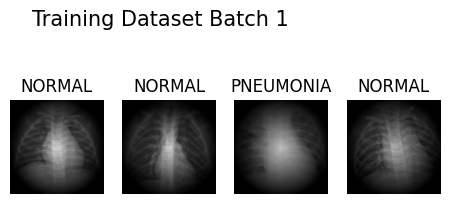

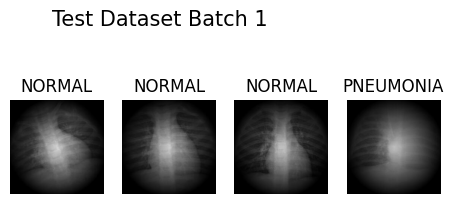

In [3]:
'''

The code below will plot the first batch.

'''

fig = plt.figure(figsize=(7, 5))
fig.suptitle('Training Dataset Batch 1', fontsize=15)
for x in range(5):
    for images, labels in train_dataset.take(x):
            ax = plt.subplot( 2, 5, x + 1)
            plt.imshow(images[x].numpy().astype("uint8"))
            plt.title(class_names[labels[x]])
            plt.axis("off")
            plt.show

fig = plt.figure(figsize=(7, 5))
fig.suptitle('Test Dataset Batch 1', fontsize=15)
for x in range(5):
    for images, labels in test_dataset.take(x):
            ax = plt.subplot( 2, 5, x + 1)
            plt.imshow(images[x].numpy().astype("uint8"))
            plt.title(class_names[labels[x]])
            plt.axis("off")
            plt.show


'''

The code below will plot all the batches used for testing purposes.

'''


# for i in range(13):
#     fig = plt.figure(figsize=(10, 5))
#     title = 'Training Dataset (Batch ' + str(i), "/12"
#     fig.suptitle(title, fontsize=15)
#     for images, labels in train_dataset.take(i):
#         for x in range(2):
#             ax = plt.subplot( 2, 5, x + 1)
#             plt.imshow(images[x].numpy().astype("uint8"))
#             plt.title(class_names[labels[x]])
#             plt.axis("off")
#             plt.show


# for i in range(13):
#     fig = plt.figure(figsize=(10, 5))
#     title = 'Test Dataset (Batch ' + str(i), "/12"
#     fig.suptitle(title, fontsize=15)
#     for images, labels in test_dataset.take(i):
#         for x in range(2):
#             ax = plt.subplot( 2, 5, x + 1)
#             plt.imshow(images[x].numpy().astype("uint8"))
#             plt.title(class_names[labels[x]])
#             plt.axis("off")
#             plt.show





# Create the model & Layers

* Dropout is best 0.6000000000000001 after testing.

* Best result are seen with LeakyReLU

* Dense = 500 is good, below 200 result dip, however with LeakyReLU around ~100 is best.

In [5]:
Autotune = tf.data.AUTOTUNE
no_classes = 2

#Trial and error of the best one


# model = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255),

#     # [ First Layer ]
#     tf.keras.layers.Conv2D(32, 4, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),

#     # [ Second Layer ]
#     tf.keras.layers.Conv2D(32, 4, activation='relu'),


#     # [ Third Layer ]
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),

#     # [ Fourth Layer ]
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
    
#     # [ Fifth Layer ]
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(500, activation='relu'),
#     tf.keras.layers.Dropout(0.3), #0.25
#     #tf.keras.layers.Dense(51280, activation='relu'),
#     tf.keras.layers.Dense(no_classes)
# ])
#accuracy: 0.8703 - loss: 0.3235 - val_accuracy: 0.8289 - val_loss: 0.3941




# model = tf.keras.Sequential([
    
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),

#     tf.keras.layers.Dropout(0.6000000000000001), #0.25
    
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(500, activation='relu'),
#     tf.keras.layers.Dense(no_classes)
# ])
#dont use



# from tensorflow.keras.layers import LeakyReLU
# model = tf.keras.Sequential([
#    tf.keras.layers.Rescaling(1./255),
#    tf.keras.layers.Conv2D(15, 3, activation=LeakyReLU(negative_slope=0.5)),
#    tf.keras.layers.MaxPooling2D(),

#    tf.keras.layers.Conv2D(15, 3, activation=LeakyReLU(negative_slope=0.5)),
#    tf.keras.layers.MaxPooling2D(),

#    tf.keras.layers.Conv2D(32, 3, activation=LeakyReLU(negative_slope=0.5)),
#    tf.keras.layers.MaxPooling2D(),

#    tf.keras.layers.Conv2D(32, 3, activation=LeakyReLU(negative_slope=0.5)),
#    tf.keras.layers.MaxPooling2D(),

#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(128, activation='relu'),
#    tf.keras.layers.Dense(no_classes)
# ])
#accuracy: 0.9725 - loss: 0.1030 - val_accuracy: 0.8421 - val_loss: 0.5990

# model = tf.keras.Sequential([
    
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 2, activation='relu'),
#     tf.keras.layers.Dropout(0.6000000000000001), #0.25
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(500, activation='relu'),
#     tf.keras.layers.Dense(no_classes)
# ])
#accuracy: 0.9137 - loss: 0.2017 - val_accuracy: 0.7632 - val_loss: 0.5522



from tensorflow.keras.layers import LeakyReLU

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(15, 3, activation=LeakyReLU(negative_slope=0.1)),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(15, 3, activation=LeakyReLU(negative_slope=0.1)),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation=LeakyReLU(negative_slope=0.1)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation=LeakyReLU(negative_slope=0.1)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100, activation='relu'),

    tf.keras.layers.Dense(no_classes)
])
#accuracy: 0.9812 - loss: 0.0387 - val_accuracy: 0.8421 - val_loss: 0.6818
#accuracy: 0.9565 - loss: 0.1234 - val_accuracy: 0.8158 - val_loss: 0.4512
#accuracy: 0.9647 - loss: 0.1280 - val_accuracy: 0.8421 - val_loss: 0.5463
#around ~Dense best
#best so far


# model = tf.keras.Sequential([
    
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.Dropout(0.6000000000000001), #0.25
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128, 3, activation='relu'),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(no_classes)
# ])
#BAD DONT USE accuracy: 0.5090 - loss: 0.6934 - val_accuracy: 0.4474 - val_loss: 0.6987

# model = tf.keras.Sequential([
    
#     tf.keras.layers.Rescaling(1./255),

#     tf.keras.layers.Conv2D(32,3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(62, 3, activation='relu'),

#     tf.keras.layers.Dropout(0.6000000000000001), #0.25
    
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128, 3, activation='relu'),

#     tf.keras.layers.Conv2D(128, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128, 3, activation='relu'),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(no_classes),

#     tf.keras.layers.Dense(no_classes, activation='softmax')
# ])
#accuracy: 0.9014 - loss: 0.2569 - val_accuracy: 0.8158 - val_loss: 0.5986


# Compile the model

* learning rate is best at 0.001 as it does not overtrain nor undertrain it. If its less it goes to acc = 50% and more decreases the acc by 2-5%, and the graph does not learn anymore, curve becomes strighter.


In [6]:
learning_rate =  0.001

model.compile(
  optimizer = keras.optimizers.Adam(learning_rate),
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), #maybe change later, BinaryCrossentropy or CategoricalCrossentropy
  metrics = ['accuracy'])

# Training & Analysis

Trains the model and provies graphs such as confusion matrix, and its learning/training.

* no_epochs can either be 15 or 20. 20 for longer training has seen better result. However it can take loger on low end PC's.
* 20 seems optimal, 15 lowers the accuracy

My current specs:

    GPU: Intel HD Graphics 520

    CPU: Intel Core i5-6300U CPU @ 2.40GHz, 4 cores


In addition for the sake of part 4.1 and 4.2, I also decided to use, for faster testing, and better results.

    GPU: RTX 4060 Laptop GPU

    CPU: 13 Gen i7 13700H

NOTE: Images can be number of images can be reduced for faster respone, however it may be better to just a different hyper parmeters.


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.4783 - loss: 0.7113 - val_accuracy: 0.4474 - val_loss: 0.6979
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.5230 - loss: 0.6812 - val_accuracy: 0.4474 - val_loss: 0.6838
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.5441 - loss: 0.6597 - val_accuracy: 0.6316 - val_loss: 0.6337
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.6802 - loss: 0.5809 - val_accuracy: 0.7500 - val_loss: 0.5348
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.7389 - loss: 0.4598 - val_accuracy: 0.7500 - val_loss: 0.6158
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.7951 - loss: 0.4971 - val_accuracy: 0.7763 - val_loss: 0.4645
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.8882 - loss: 0.2897 - val_accuracy: 0.7763 - val_loss: 0.6600
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.9017 - loss: 0.2858 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 248, 248, 15)   │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 124, 124, 15)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 122, 122, 15)   │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 61, 61, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 59, 59, 32)     │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 27, 27, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,671,488 (6.38 MB)

 Trainable params: 557,162 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,114,326 (4.25 MB)

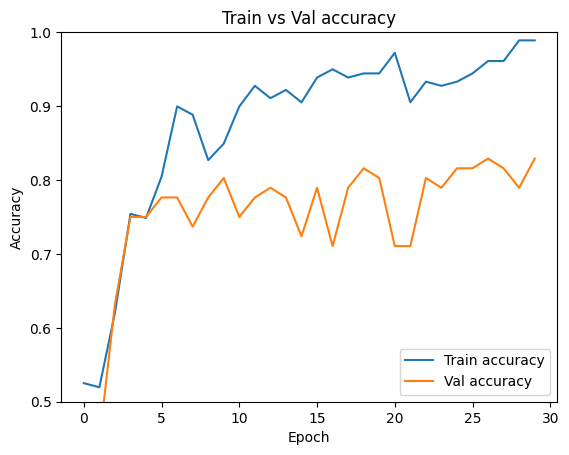

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Predictions for validation set: [1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 0 1]


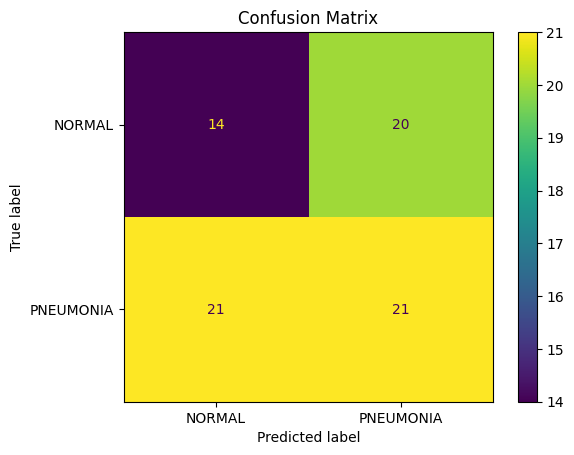

In [7]:
no_epochs = 30


history = model.fit(
  train_dataset,
  validation_data = test_dataset,
  epochs= no_epochs
)


'''

'''

model.summary()


'''

'''


plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')
plt.title('Train vs Val accuracy')
plt.show()


'''

Actual Labels with an numpy array.

'''

y_true = np.array([])
for image_batch, labels_batch in test_dataset:
    y_true = np.append(y_true, labels_batch.numpy())

'''

# Evaluate Model

'''

y_prediction = model.predict(test_dataset)
y_prediction = np.argmax(y_prediction, axis = 1)
print('Predictions for validation set: ' + str(y_prediction))

'''

Print confusion matrix

'''

cm = confusion_matrix(y_true, y_prediction)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)
display.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()



# Save

Results above also show that it is more biased towards pneumonia for good reason.

In [8]:


model.save('model.keras')